# Calculate and Plot Activity


Given an existing database for Al-Zn, we would like to calculate the activity of the liquid.
In order to make sure we are correct, we'll compare the values with experimental results.


### Set up the database

In [1]:
from pycalphad import Database, equilibrium, variables as v
import numpy as np

dbf = Database('alzn_mey.tdb') 

comps = ['AL', 'ZN', 'VA']
phases = list(dbf.phases.keys())

## Calculate the reference state

You could also include this in the equilibrium calculation in the next step and select out the point you want, but it might be clear to be more explicit.

In [2]:
ref_eq = equilibrium(dbf, comps, phases, {v.P: 101325, v.T: 1023, v.X('ZN'): 1})

## Calculate the equilibria

Do the calculation over the compoisition range

In [3]:
eq = equilibrium(dbf, comps, phases, {v.P: 1013325, v.T: 1023, v.X('ZN'): (0, 1, 0.005)})

## Get the chemical potentials and calculate activity

We need to select the chemical potentials from the xarray Dataset and calculate the activity.

In [4]:
chempot_ref = ref_eq.MU.sel(component='ZN').squeeze()
chempot = eq.MU.sel(component='ZN').squeeze()

acr_zn = np.exp((chempot - chempot_ref)/(8.315*1023))

## Experimental activity results

For comparision, we'll add experimental results.

Activties are digtized from Fig 18 in Yazawa, A., & Lee, Y. K. (1970). Thermodynamic Studies of the Liquid Aluminum Alloy Systems. Transactions of the Japan Institute of Metals, 11(6), 411–418. http://doi.org/10.2320/matertrans1960.11.411

The measurements at at 1073 K (the same temperature our calculations were at) and the reference is the pure components at that temperature.

In [5]:
exp_x_zn =   [0.0482, 0.1990, 0.3550, 0.5045, 0.6549, 0.8070, 0.9569]
exp_acr_zn = [0.1154, 0.3765, 0.5411, 0.6433, 0.7352, 0.8384, 0.9531]

## Plot the result

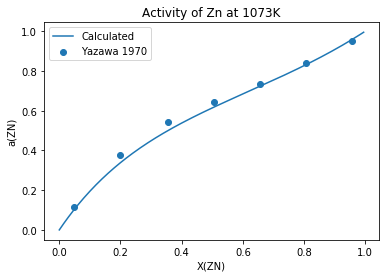

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(eq.X.sel(component='ZN', vertex=0).squeeze(), acr_zn, label='Calculated')
# add experimental data
plt.scatter(exp_x_zn, exp_acr_zn, label='Yazawa 1970')

plt.xlabel('X(ZN)')
plt.ylabel('a(ZN)')
plt.title('Activity of Zn at 1073K')
plt.legend(loc=0)